In [69]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

In [70]:
file = 'dataset.csv'

dataset = pd.read_csv(file)
print(dataset.shape)
# dataset.head().transpose()


""" 전처리 """
cols_drop_info = ['종목코드', '기준가1', '녹인가1', '환매일 종가', '평가기준가']
cols_drop_duplicate = ['평가구분', '상환조건달성'] + ['녹인발생차수'] # unique 값이 1개
cols_drop_future = ['상환구분', '상환실현차수']

cols_drop_dt = ['발행일', '상환일', '평가시작일', '평가종료일', '환매결정일', '녹인발생일']
# 데이터 타입 변경
for col in cols_drop_dt:
    dataset[col] = pd.to_datetime(dataset[col])


# 피처로 쓰기 애매함
cols_cnt = [
    '녹인일수', '녹인일수_전', '영업일수', '상환일수'
]

cols_feature = ['차수', '기초자산개수', '녹인발생차수_차이']
cols_cat = ['환매일종가위치'] # 범주형 변수
cols_dummy = ['환매일종가위치_code']
dataset['환매일종가위치_code'] = dataset['환매일종가위치'].astype('category').cat.codes.astype(float)
cols_pct100 = [
    '상환조건(%)', '하한 수준(%)', '상환조건감소량(%)_prev', '상환조건감소량(%)_next',
    '환매일 수준(%)', '녹인대비상환수준(%)', '환매대비상환수준(%)', '환매대비상환수준(%)_next'
]
cols_pct = [
    '녹인비율', '녹인비율_전', 'H총증감률', 'H평균증감률', 'H일평균증감률', 'H이전대비증감률', '상환비율'
]
# 비율 단위 변경
for col in cols_pct:
    col_new = col+"(%)"
    dataset[col_new] = dataset[col]*100
    cols_pct100.append(col_new)

#
cols_drop = cols_drop_info + cols_drop_duplicate + cols_drop_future + cols_drop_dt + cols_cat


(1750, 40)


In [71]:
dataset['환매결정일'] = pd.to_datetime(dataset['환매결정일'])
dataset.set_index('환매결정일', inplace= True)
dataset.head()

,종목코드,차수,평가구분,평가종료일,상환조건(%),평가시작일,발행일,상환일,상환구분,상환실현차수,...,환매대비상환수준(%),환매대비상환수준(%)_next,환매일종가위치_code,녹인비율(%),녹인비율_전(%),H총증감률(%),H평균증감률(%),H일평균증감률(%),H이전대비증감률(%),상환비율(%)
환매결정일,,,,,,,,,,,,,,,,,,,,,
2016-04-25,KR6503313555,2.0,중간평가,2016-05-10,80.0,2015-11-10,2015-05-14,2017-11-09,조기상환,5.0,...,14.767983,14.767983,2.0,0.892857,0.000000,-12.878755,-0.114989,-0.123417,-25.125018,0.0
2016-10-24,KR6503313555,3.0,중간평가,2016-11-08,80.0,2016-05-11,2015-05-14,2017-11-09,조기상환,5.0,...,8.477525,8.477525,2.0,0.000000,0.892857,16.689786,0.147697,0.138876,-18.139772,0.0
2017-04-24,KR6503313555,4.0,중간평가,2017-05-09,80.0,2016-11-09,2015-05-14,2017-11-09,조기상환,5.0,...,6.628437,1.628437,2.0,0.000000,0.000000,7.772643,0.070024,0.045101,11.073268,0.0
2016-03-17,KR6503322549,2.0,중간평가,2016-04-01,80.0,2015-10-06,2015-04-10,2017-09-29,조기상환,5.0,...,17.273914,17.273914,2.0,2.678571,0.000000,-11.656816,-0.104079,-0.090297,-28.997256,0.0
2016-09-19,KR6503322549,3.0,중간평가,2016-10-04,80.0,2016-04-02,2015-04-10,2017-09-29,조기상환,5.0,...,10.311141,10.311141,2.0,0.000000,2.678571,12.313689,0.107076,0.091872,-12.611251,0.0


In [72]:
import pandas as pd
long = pd.read_csv('장기피처_합치기_is.csv')
long.rename(columns= {'Unnamed: 0':'환매결정일'}, inplace= True)
long['환매결정일'] = pd.to_datetime(long['환매결정일'])
long.set_index('환매결정일', inplace= True)
long.head()

,변동,Dubai,Brent,WTI,Oman,Dubai(%),Brent(%),WTI(%),Oman(%),IIP(%),...,CLI_IDN_pct,CLI_ITA_pct,CLI_JPN_pct,CLI_KOR_pct,CLI_MEX_pct,CLI_TUR_pct,CLI_USA_pct,CLI_ZAF_pct,MSCI_China(USD),msci_China(USD)(%)
환매결정일,,,,,,,,,,,,,,,,,,,,,
2015-01-01,0.000000,53.60,57.33,53.27,54.02,0.000000,0.000000,0.000000,0.000000,13.118221,...,0.00338,0.093557,0.039689,0.179878,-0.16923,-0.056187,-0.068611,-0.05659,65.289,1.519157
2015-01-02,0.034821,53.27,56.42,52.69,53.53,-0.615672,-1.587302,-1.088793,-0.907071,13.118221,...,0.00338,0.093557,0.039689,0.179878,-0.16923,-0.056187,-0.068611,-0.05659,65.289,1.519157
2015-01-03,0.034821,53.27,56.42,52.69,53.53,-0.615672,-1.587302,-1.088793,-0.907071,13.118221,...,0.00338,0.093557,0.039689,0.179878,-0.16923,-0.056187,-0.068611,-0.05659,65.289,1.519157
2015-01-04,0.034821,53.27,56.42,52.69,53.53,-0.615672,-1.587302,-1.088793,-0.907071,13.118221,...,0.00338,0.093557,0.039689,0.179878,-0.16923,-0.056187,-0.068611,-0.05659,65.289,1.519157
2015-01-05,-0.006446,50.98,53.11,50.04,51.39,-4.298855,-5.866714,-5.029417,-3.997758,13.118221,...,0.00338,0.093557,0.039689,0.179878,-0.16923,-0.056187,-0.068611,-0.05659,65.289,1.519157


In [ ]:
import pandas as pd
short = pd.read_csv('final_total.csv.csv')
short.rename(columns= {'Unnamed: 0':'환매결정일'}, inplace= True)
short['환매결정일'] = pd.to_datetime(short['환매결정일'])
short.set_index('환매결정일', inplace= True)
short.head()

In [73]:
dataset = pd.merge(
    dataset, long,
    left_index=True, right_index=True,
    how='inner'
)

In [74]:
dataset

,종목코드,차수,평가구분,평가종료일,상환조건(%),평가시작일,발행일,상환일,상환구분,상환실현차수,...,CLI_IDN_pct,CLI_ITA_pct,CLI_JPN_pct,CLI_KOR_pct,CLI_MEX_pct,CLI_TUR_pct,CLI_USA_pct,CLI_ZAF_pct,MSCI_China(USD),msci_China(USD)(%)
환매결정일,,,,,,,,,,,,,,,,,,,,,
2016-02-17,KR6653307530,2.0,중간평가,2016-03-03,90.0,2015-09-05,2015-03-06,2017-03-07,조기상환,4.0,...,0.146153,-0.028750,-0.079382,-0.014850,0.022488,-0.100789,-0.085688,-0.092085,59.407,-1.309079
2016-03-14,KR6543302543,2.0,중간평가,2016-03-29,87.0,2015-10-01,2015-04-02,2017-10-10,조기상환,5.0,...,0.150541,-0.045815,-0.055685,0.006380,0.056681,-0.068991,-0.058885,-0.099387,51.850,-12.720723
2016-03-14,KR6653359531,2.0,중간평가,2016-03-29,90.0,2015-09-26,2015-03-30,2017-10-10,조기상환,5.0,...,0.150541,-0.045815,-0.055685,0.006380,0.056681,-0.068991,-0.058885,-0.099387,51.850,-12.720723
2016-03-15,KR6763301548,2.0,중간평가,2016-03-30,90.0,2015-09-30,2015-04-03,2017-10-11,조기상환,5.0,...,0.150541,-0.045815,-0.055685,0.006380,0.056681,-0.068991,-0.058885,-0.099387,51.850,-12.720723
2016-03-17,KR6503322549,2.0,중간평가,2016-04-01,80.0,2015-10-06,2015-04-10,2017-09-29,조기상환,5.0,...,0.150541,-0.045815,-0.055685,0.006380,0.056681,-0.068991,-0.058885,-0.099387,51.850,-12.720723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-11-27,KR6533367563,5.0,중간평가,2017-12-12,85.0,2017-06-13,2015-06-15,2018-06-18,만기상환,6.0,...,-0.097552,0.190547,-0.004272,-0.185741,0.001765,0.085497,0.122936,0.193984,82.247,0.842325
2017-12-03,KR65733CW563,5.0,중간평가,2017-12-18,85.0,2017-06-21,2015-06-26,2018-06-25,만기상환,6.0,...,-0.123250,0.134890,-0.001590,-0.209756,0.027943,-0.072185,0.124780,0.158317,85.508,3.964886
2017-12-04,KR65133AF565,5.0,중간평가,2017-12-19,90.0,2017-06-20,2015-06-22,2018-06-22,만기상환,6.0,...,-0.123250,0.134890,-0.001590,-0.209756,0.027943,-0.072185,0.124780,0.158317,85.508,3.964886


In [75]:
cols_feature_long = long.columns

In [76]:
dataset_values = dataset.reset_index().drop(columns=cols_drop+cols_pct)
dataset_values.shape

(1750, 112)

In [77]:
dataset_values.dtypes

차수                    float64
상환조건(%)               float64
하한 수준(%)              float64
기초자산개수                  int64
label                 float64
                       ...   
CLI_TUR_pct           float64
CLI_USA_pct           float64
CLI_ZAF_pct           float64
MSCI_China(USD)       float64
msci_China(USD)(%)    float64
Length: 112, dtype: object

In [78]:
dataset_values.corr()['label'].sort_values()*100

환매대비상환수준(%)_next   -67.553536
환매대비상환수준(%)        -63.725726
대출금리_ind           -60.904040
시장금리_sing          -60.904040
대출금리_kor           -60.904040
                      ...    
대출금리_chn                  NaN
예금금리_chn                  NaN
CLI_ESP_dummy             NaN
CLI_ITA_dummy             NaN
CLI_KOR_dummy             NaN
Name: label, Length: 112, dtype: float64

In [79]:
dataset_values.corr()

,차수,상환조건(%),하한 수준(%),기초자산개수,label,녹인일수,영업일수,녹인일수_전,상환일수,녹인발생차수_차이,...,CLI_IDN_pct,CLI_ITA_pct,CLI_JPN_pct,CLI_KOR_pct,CLI_MEX_pct,CLI_TUR_pct,CLI_USA_pct,CLI_ZAF_pct,MSCI_China(USD),msci_China(USD)(%)
차수,1.000000,-0.422064,0.009502,-0.022692,0.585094,-0.532613,0.179921,-0.022509,0.170254,1.000000,...,-0.376141,0.900975,0.401310,-0.525444,-0.116811,0.611307,0.588556,0.675945,0.926929,0.246519
상환조건(%),-0.422064,1.000000,0.163591,-0.134639,-0.433229,0.340658,-0.023649,0.072564,-0.165181,-0.422064,...,0.076101,-0.370080,-0.250184,0.140126,-0.037426,-0.304370,-0.265138,-0.232759,-0.365835,-0.162507
하한 수준(%),0.009502,0.163591,1.000000,-0.243957,0.004745,0.399160,0.001806,0.399022,0.011780,0.009502,...,-0.031504,0.026873,0.003177,-0.032195,-0.012216,0.030206,0.025185,0.038631,0.034841,-0.040680
기초자산개수,-0.022692,-0.134639,-0.243957,1.000000,0.007026,-0.103420,0.020033,-0.103487,-0.016580,-0.022692,...,0.037936,-0.036005,-0.010513,0.043403,-0.011158,-0.042146,-0.031989,-0.043921,-0.053338,-0.011893
label,0.585094,-0.433229,0.004745,0.007026,1.000000,-0.290470,-0.082302,-0.247630,0.201088,0.585094,...,-0.196247,0.599772,0.114216,-0.424188,-0.045621,0.379707,0.170361,0.331952,0.542518,0.074426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CLI_TUR_pct,0.611307,-0.304370,0.030206,-0.042146,0.379707,-0.393541,-0.287166,0.034211,-0.024597,0.611307,...,0.073843,0.469652,0.458801,-0.080028,0.413333,1.000000,0.274990,0.284663,0.528226,0.657430
CLI_USA_pct,0.588556,-0.265138,0.025185,-0.031989,0.170361,-0.424629,0.569412,0.309028,0.100764,0.588556,...,-0.445275,0.395466,0.604000,-0.080358,-0.177217,0.274990,1.000000,0.685011,0.652713,0.384356
CLI_ZAF_pct,0.675945,-0.232759,0.038631,-0.043921,0.331952,-0.295250,0.566074,0.022406,0.195609,0.675945,...,-0.833958,0.577271,0.039169,-0.697246,-0.609670,0.284663,0.685011,1.000000,0.848836,0.207102
MSCI_China(USD),0.926929,-0.365835,0.034841,-0.053338,0.542518,-0.473142,0.291522,-0.063894,0.210719,0.926929,...,-0.632128,0.859748,0.241587,-0.686993,-0.308155,0.528226,0.652713,0.848836,1.000000,0.295353


In [80]:
dataset_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1750 entries, 0 to 1749
Columns: 112 entries, 차수 to msci_China(USD)(%)
dtypes: float64(91), int64(21)
memory usage: 1.5 MB


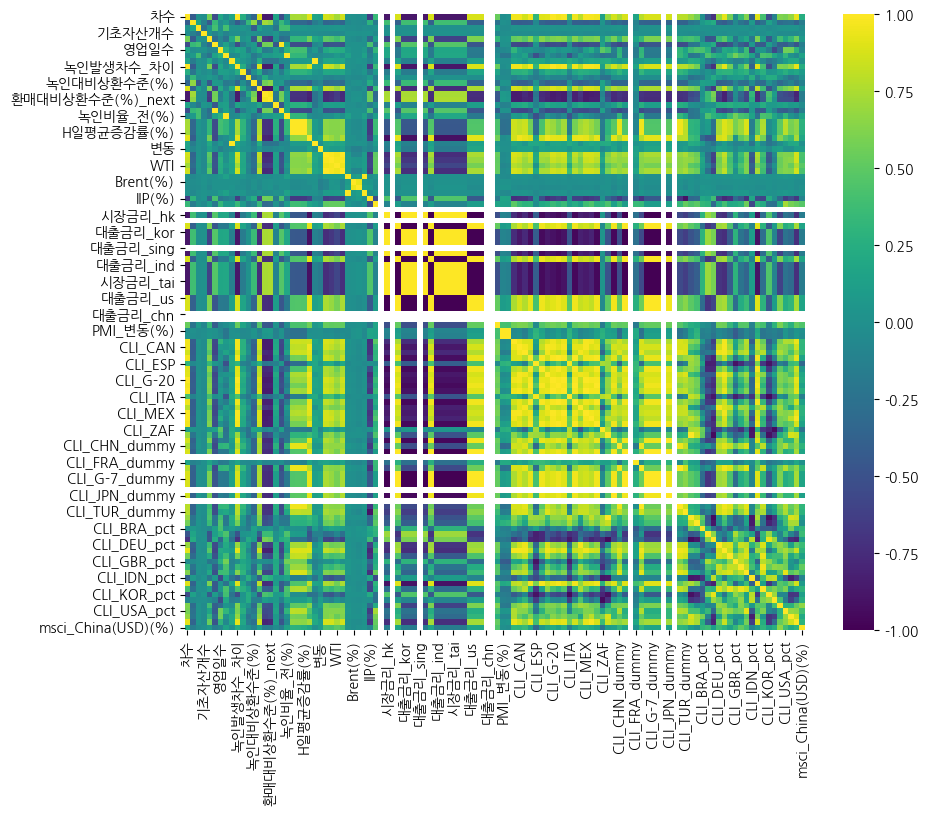

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming dataset_values is your data
correlation_matrix = dataset_values.corr()

# Set the figure size
plt.figure(figsize=(10, 8))

# Create the heatmap with adjusted text size
# sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='g', annot_kws={'size': 5})
sns.heatmap(correlation_matrix, cmap='viridis', fmt='g')

# Show the plot
plt.show()


In [82]:
dataset_values.shape

(1750, 112)

In [83]:
dataset_values.columns.difference(['label']).shape

(111,)

In [84]:
for col in dataset_values.columns:
    print(col)

차수
상환조건(%)
하한 수준(%)
기초자산개수
label
녹인일수
영업일수
녹인일수_전
상환일수
녹인발생차수_차이
상환조건감소량(%)_prev
상환조건감소량(%)_next
녹인대비상환수준(%)
환매일 수준(%)
환매대비상환수준(%)
환매대비상환수준(%)_next
환매일종가위치_code
녹인비율(%)
녹인비율_전(%)
H총증감률(%)
H평균증감률(%)
H일평균증감률(%)
H이전대비증감률(%)
상환비율(%)
변동
Dubai
Brent
WTI
Oman
Dubai(%)
Brent(%)
WTI(%)
Oman(%)
IIP(%)
RGDP(%)
대출금리_hk
시장금리_hk
예금금리_hk
초단기 국채율_hk
대출금리_kor
시장금리_kor
예금금리_kor
대출금리_sing
시장금리_sing
예금금리_sing
대출금리_ind
시장금리_ind
대출금리_tai
시장금리_tai
예금금리_tai
초단기 국채율_tai
대출금리_us
시장금리_us
초단기 국채율_us
대출금리_chn
예금금리_chn
PMI_dummy
PMI_변동(%)
PMI_차이
CLI_BRA
CLI_CAN
CLI_CHN
CLI_DEU
CLI_ESP
CLI_FRA
CLI_GBR
CLI_G-20
CLI_G-7
CLI_IDN
CLI_ITA
CLI_JPN
CLI_KOR
CLI_MEX
CLI_TUR
CLI_USA
CLI_ZAF
CLI_BRA_dummy
CLI_CAN_dummy
CLI_CHN_dummy
CLI_DEU_dummy
CLI_ESP_dummy
CLI_FRA_dummy
CLI_GBR_dummy
CLI_G-20_dummy
CLI_G-7_dummy
CLI_IDN_dummy
CLI_ITA_dummy
CLI_JPN_dummy
CLI_KOR_dummy
CLI_MEX_dummy
CLI_TUR_dummy
CLI_USA_dummy
CLI_ZAF_dummy
CLI_BRA_pct
CLI_CAN_pct
CLI_CHN_pct
CLI_DEU_pct
CLI_ESP_pct
CLI_FRA_pct
CLI_GBR_pct
CLI_G-20_pct
CLI_G

In [85]:
dataset_values.columns.difference(['label'])

Index(['Brent', 'Brent(%)', 'CLI_BRA', 'CLI_BRA_dummy', 'CLI_BRA_pct',
       'CLI_CAN', 'CLI_CAN_dummy', 'CLI_CAN_pct', 'CLI_CHN', 'CLI_CHN_dummy',
       ...
       '예금금리_tai', '차수', '초단기 국채율_hk', '초단기 국채율_tai', '초단기 국채율_us', '하한 수준(%)',
       '환매대비상환수준(%)', '환매대비상환수준(%)_next', '환매일 수준(%)', '환매일종가위치_code'],
      dtype='object', length=111)

In [86]:
# col_X = cols_feature + cols_pct100
col_X = dataset_values.columns.difference(['label'])
col_y = 'label'

# df = dataset[col_X + [col_y]]
df = dataset_values

X = dataset_values[col_X]
y = dataset_values[col_y]

df.shape, X.shape, y.shape

((1750, 112), (1750, 111), (1750,))

In [87]:
X.head(2).transpose()

,0,1
Brent,34.500000,39.530000
Brent(%),7.209447,-2.129240
CLI_BRA,96.031960,96.182240
CLI_BRA_dummy,0.000000,0.000000
CLI_BRA_pct,0.078713,0.156490
...,...,...
하한 수준(%),65.000000,60.000000
환매대비상환수준(%),21.689432,18.404981
환매대비상환수준(%)_next,16.689432,16.404981
환매일 수준(%),68.310568,68.595019


In [88]:
col_X

Index(['Brent', 'Brent(%)', 'CLI_BRA', 'CLI_BRA_dummy', 'CLI_BRA_pct',
       'CLI_CAN', 'CLI_CAN_dummy', 'CLI_CAN_pct', 'CLI_CHN', 'CLI_CHN_dummy',
       ...
       '예금금리_tai', '차수', '초단기 국채율_hk', '초단기 국채율_tai', '초단기 국채율_us', '하한 수준(%)',
       '환매대비상환수준(%)', '환매대비상환수준(%)_next', '환매일 수준(%)', '환매일종가위치_code'],
      dtype='object', length=111)

In [89]:
# X[cols_pct100].hist(figsize=(30, 30))
# plt.show()

In [90]:
# X[cols_feature].boxplot(figsize=(30, 10))
# plt.show()

In [91]:
# X[cols_pct100].boxplot(figsize=(30, 10))
# plt.show()

In [92]:
cols_feature_long

Index(['변동', 'Dubai', 'Brent', 'WTI', 'Oman', 'Dubai(%)', 'Brent(%)', 'WTI(%)',
       'Oman(%)', 'IIP(%)', 'RGDP(%)', '대출금리_hk', '시장금리_hk', '예금금리_hk',
       '초단기 국채율_hk', '대출금리_kor', '시장금리_kor', '예금금리_kor', '대출금리_sing',
       '시장금리_sing', '예금금리_sing', '대출금리_ind', '시장금리_ind', '대출금리_tai',
       '시장금리_tai', '예금금리_tai', '초단기 국채율_tai', '대출금리_us', '시장금리_us',
       '초단기 국채율_us', '대출금리_chn', '예금금리_chn', 'PMI_dummy', 'PMI_변동(%)',
       'PMI_차이', 'CLI_BRA', 'CLI_CAN', 'CLI_CHN', 'CLI_DEU', 'CLI_ESP',
       'CLI_FRA', 'CLI_GBR', 'CLI_G-20', 'CLI_G-7', 'CLI_IDN', 'CLI_ITA',
       'CLI_JPN', 'CLI_KOR', 'CLI_MEX', 'CLI_TUR', 'CLI_USA', 'CLI_ZAF',
       'CLI_BRA_dummy', 'CLI_CAN_dummy', 'CLI_CHN_dummy', 'CLI_DEU_dummy',
       'CLI_ESP_dummy', 'CLI_FRA_dummy', 'CLI_GBR_dummy', 'CLI_G-20_dummy',
       'CLI_G-7_dummy', 'CLI_IDN_dummy', 'CLI_ITA_dummy', 'CLI_JPN_dummy',
       'CLI_KOR_dummy', 'CLI_MEX_dummy', 'CLI_TUR_dummy', 'CLI_USA_dummy',
       'CLI_ZAF_dummy', 'CLI_BRA_pct', 'CLI_CAN_pc

In [93]:
# from sklearn.preprocessing import StandardScaler

# # Assuming cols_feature_long is your DataFrame
# # Select only the numerical columns for scaling
# columns_to_scale = ['변동', 'Dubai', 'Brent', 'WTI', 'Oman', 'Dubai(%)', 'Brent(%)', 'WTI(%)',
#                     'Oman(%)', 'IIP(%)', 'RGDP(%)', '대출금리_hk', '시장금리_hk', '예금금리_hk',
#                     '초단기 국채율_hk', '대출금리_kor', '시장금리_kor', '예금금리_kor', '대출금리_sing',
#                     '시장금리_sing', '예금금리_sing', '대출금리_ind', '시장금리_ind', '대출금리_tai',
#                     '시장금리_tai', '예금금리_tai', '초단기 국채율_tai', '대출금리_us', '시장금리_us',
#                     '초단기 국채율_us', '대출금리_chn', '예금금리_chn', 'PMI_변동(%)',
#                     'PMI_차이', 'CLI_BRA', 'CLI_CAN', 'CLI_CHN', 'CLI_DEU', 'CLI_ESP',
#                     'CLI_FRA', 'CLI_GBR', 'CLI_G-20', 'CLI_G-7', 'CLI_IDN', 'CLI_ITA',
#                     'CLI_JPN', 'CLI_KOR', 'CLI_MEX', 'CLI_TUR', 'CLI_USA', 'CLI_ZAF', 'MSCI_China(USD)']

# # Create a subset of the DataFrame with only the selected columns
# subset_df = X[columns_to_scale]

# # Create an instance of StandardScaler
# scaler = StandardScaler()

# # Fit the scaler to the selected columns and transform them
# scaled_data = scaler.fit_transform(subset_df)

# # Update the original DataFrame with the scaled values
# X[columns_to_scale] = scaled_data


In [94]:
# import matplotlib.pyplot as plt

# # Assuming cols_feature_long is your DataFrame
# # Assuming X is your DataFrame after standard scaling

# # Create a boxplot for the selected columns
# X[columns_to_scale].boxplot(figsize=(30, 10))
# plt.title('Boxplot of Standard Scaled Columns')
# plt.show()


In [95]:
# X[cols_feature_long].boxplot(figsize=(30, 10))
# plt.show()

In [96]:
y.value_counts()

label
0.0    1346
1.0     404
Name: count, dtype: int64

In [97]:
#### wrapper

# Forward Selection

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# 학습 데이터와 검증 데이터 분리
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Forward feature selection 수행
selected_features = []
best_score = 0

while len(selected_features) < X.shape[1]: #무한 반복 루프 전체 특성의 개수보다 선택된 특성의 개수가 작을때 까지 반복
    best_feature = None #가장좋은 특성 이름
    best_model = None #가장좋은 모델 저장
    best_score_local = 0 #가장 높은 정확도

    for feature in X_train.columns:
        if feature not in selected_features:
            features = selected_features + [feature]
            X_train_selected = X_train[features]
            X_val_selected = X_val[features]

            model = LogisticRegression()
            model.fit(X_train_selected, y_train)
            score = model.score(X_val_selected, y_val)

            if score > best_score_local:
                best_score_local = score
                best_feature = feature
                best_model = model

    if best_score_local > best_score:
        selected_features.append(best_feature)
        best_score = best_score_local
        print(f"Selected feature: {best_feature}, Accuracy: {best_score:.4f}")

    else:
        break

print("\nForward selected features:")
Forward = selected_features
print(Forward)

Selected feature: 환매대비상환수준(%)_next, Accuracy: 0.9200
Selected feature: 영업일수, Accuracy: 0.9486
Selected feature: 환매일 수준(%), Accuracy: 0.9543
Selected feature: CLI_CAN_dummy, Accuracy: 0.9571
Selected feature: 녹인비율_전(%), Accuracy: 0.9600
Selected feature: CLI_DEU_dummy, Accuracy: 0.9629

Forward selected features:
['환매대비상환수준(%)_next', '영업일수', '환매일 수준(%)', 'CLI_CAN_dummy', '녹인비율_전(%)', 'CLI_DEU_dummy']


In [98]:
# Backward Elimination
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# 학습 데이터와 검증 데이터 분리
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42,stratify= y)

# Backward feature selection 수행
selected_features = X_train.columns.tolist()
best_score = 0

while len(selected_features) > 0:
    worst_feature = None
    best_model = None
    best_score_local = 0

    for feature in selected_features:
        features = selected_features.copy()
        features.remove(feature)

        X_train_selected = X_train[features]
        X_val_selected = X_val[features]

        model = LogisticRegression()
        model.fit(X_train_selected, y_train)
        score = model.score(X_val_selected, y_val)

        if score > best_score_local:
            best_score_local = score
            worst_feature = feature
            best_model = model

    if best_score_local > best_score:
        selected_features.remove(worst_feature)
        best_score = best_score_local
        print(f"Removed feature: {worst_feature}, Accuracy: {best_score:.4f}")

    else:
        break

print("\nFinal selected features:")
Backward = selected_features
print(Backward)


Removed feature: Oman, Accuracy: 0.9657

Final selected features:
['Brent', 'Brent(%)', 'CLI_BRA', 'CLI_BRA_dummy', 'CLI_BRA_pct', 'CLI_CAN', 'CLI_CAN_dummy', 'CLI_CAN_pct', 'CLI_CHN', 'CLI_CHN_dummy', 'CLI_CHN_pct', 'CLI_DEU', 'CLI_DEU_dummy', 'CLI_DEU_pct', 'CLI_ESP', 'CLI_ESP_dummy', 'CLI_ESP_pct', 'CLI_FRA', 'CLI_FRA_dummy', 'CLI_FRA_pct', 'CLI_G-20', 'CLI_G-20_dummy', 'CLI_G-20_pct', 'CLI_G-7', 'CLI_G-7_dummy', 'CLI_G-7_pct', 'CLI_GBR', 'CLI_GBR_dummy', 'CLI_GBR_pct', 'CLI_IDN', 'CLI_IDN_dummy', 'CLI_IDN_pct', 'CLI_ITA', 'CLI_ITA_dummy', 'CLI_ITA_pct', 'CLI_JPN', 'CLI_JPN_dummy', 'CLI_JPN_pct', 'CLI_KOR', 'CLI_KOR_dummy', 'CLI_KOR_pct', 'CLI_MEX', 'CLI_MEX_dummy', 'CLI_MEX_pct', 'CLI_TUR', 'CLI_TUR_dummy', 'CLI_TUR_pct', 'CLI_USA', 'CLI_USA_dummy', 'CLI_USA_pct', 'CLI_ZAF', 'CLI_ZAF_dummy', 'CLI_ZAF_pct', 'Dubai', 'Dubai(%)', 'H이전대비증감률(%)', 'H일평균증감률(%)', 'H총증감률(%)', 'H평균증감률(%)', 'IIP(%)', 'MSCI_China(USD)', 'Oman(%)', 'PMI_dummy', 'PMI_변동(%)', 'PMI_차이', 'RGDP(%)', 'WTI', 'WTI(%)',

In [99]:
# Stepwise Selection
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# 학습 데이터와 검증 데이터 분리
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify= y)

# Stepwise feature selection 수행
selected_features = []
best_score = 0

# Forward step
while len(selected_features) < X.shape[1]:
    best_feature = None
    best_model = None
    best_score_local = 0

    for feature in X_train.columns:
        if feature not in selected_features:
            features = selected_features + [feature]
            X_train_selected = X_train[features]
            X_val_selected = X_val[features]

            model = LogisticRegression()
            model.fit(X_train_selected, y_train)
            score = model.score(X_val_selected, y_val)

            if score > best_score_local:
                best_score_local = score
                best_feature = feature
                best_model = model

    if best_score_local > best_score:
        selected_features.append(best_feature)
        best_score = best_score_local
        print(f"Selected feature: {best_feature}, Accuracy: {best_score:.4f}")

    else:
        break

# Backward step
while len(selected_features) > 0:
    worst_feature = None
    best_model = None
    best_score_local = 0

    for feature in selected_features:
        features = selected_features.copy()
        features.remove(feature)

        X_train_selected = X_train[features]
        X_val_selected = X_val[features]

        model = LogisticRegression()
        model.fit(X_train_selected, y_train)
        score = model.score(X_val_selected, y_val)

        if score > best_score_local:
            best_score_local = score
            worst_feature = feature
            best_model = model

    if best_score_local > best_score:
        selected_features.remove(worst_feature)
        best_score = best_score_local
        print(f"Removed feature: {worst_feature}, Accuracy: {best_score:.4f}")

    else:
        break

print("\nFinal selected features:")
Stepwise = selected_features


Selected feature: 환매대비상환수준(%)_next, Accuracy: 0.9200
Selected feature: 영업일수, Accuracy: 0.9486
Selected feature: 환매일 수준(%), Accuracy: 0.9543
Selected feature: CLI_CAN_dummy, Accuracy: 0.9571
Selected feature: 녹인비율_전(%), Accuracy: 0.9600
Selected feature: CLI_DEU_dummy, Accuracy: 0.9629

Final selected features:


2. filter

In [100]:
# H가 1인 경우 이분산성 / H가 0인 경우 등분산
from scipy.stats import bartlett
def bartlett_test(col, p_value = 0.05, H = 1):
    list= []
    for i in col:
        T, p_val =bartlett(df[df['label']==1][i], df[df['label']==0][i]) 
        list.append([i, p_val])

    list = pd.DataFrame(list, columns = ['변수', 'p_value'])
    if H == 1:
        a = list[(list['p_value'] < p_value)][['변수', 'p_value']].sort_values('p_value')
        return a
    else:
        a = list[(list['p_value'] >= p_value)][['변수', 'p_value']].sort_values('p_value')
        return a

In [101]:
# 이분산성 변수
x_hetero = bartlett_test(df.columns, H = 1)
# 등분산성 변수
x_homo = bartlett_test(df.columns, H = 0)

In [102]:
# t-test

import scipy.stats as stats
def t_test(col, col_h0, col_h1, p_value = 0.05):
    list= []
    for i in col:
        if (col_h0['변수']==i).any():
            t_stat, p_val = stats.ttest_ind(df[df['label']==1][i], df[df['label']==0][i], equal_var=True) # 등분산성 : wald t-test
            list.append([i, p_val])
        elif (col_h1['변수']==i).any():
            t_stat, p_val = stats.ttest_ind(df[df['label']==1][i], df[df['label']==0][i], equal_var=False) # 이분산성 : welch’s t-test
            list.append([i, p_val])

    list = pd.DataFrame(list, columns = ['변수', 'p_value'])
    a = list[(list['p_value'] < p_value)][['변수', 'p_value']].sort_values('p_value')
    return a

In [103]:
# 2) t_test 결과 p_value < 0.05보다 작은 유의한 변수 가져오기
x_ttest = t_test(df.columns, x_homo, x_hetero, p_value=0.1)
print("유의한 피쳐 수 :", len(x_ttest))
x_ttest.sort_values(by="변수", ascending=True)

유의한 피쳐 수 : 95


,변수,p_value
25,Brent,5.590697e-92
56,CLI_BRA,3.383303e-172
73,CLI_BRA_dummy,1.438477e-37
87,CLI_BRA_pct,3.890881e-02
57,CLI_CAN,8.716566e-310
...,...,...
48,초단기 국채율_tai,0.000000e+00
51,초단기 국채율_us,0.000000e+00
13,환매대비상환수준(%),3.051906e-263
14,환매대비상환수준(%)_next,9.881313e-324


In [104]:
ttest = list(x_ttest['변수'])
ttest

['대출금리_ind',
 '대출금리_us',
 '시장금리_us',
 '초단기 국채율_us',
 '시장금리_tai',
 '예금금리_sing',
 '대출금리_tai',
 '시장금리_ind',
 '시장금리_hk',
 '초단기 국채율_hk',
 'CLI_JPN',
 '예금금리_tai',
 '대출금리_kor',
 '시장금리_kor',
 '예금금리_kor',
 'CLI_CAN_dummy',
 'CLI_DEU_dummy',
 'CLI_G-20_dummy',
 'CLI_G-7_dummy',
 'CLI_IDN_dummy',
 'CLI_JPN_dummy',
 '시장금리_sing',
 '초단기 국채율_tai',
 '환매대비상환수준(%)_next',
 'H이전대비증감률(%)',
 'CLI_CAN',
 'CLI_USA',
 'CLI_GBR',
 'CLI_G-7',
 'CLI_IDN',
 'CLI_FRA',
 'CLI_MEX',
 '환매대비상환수준(%)',
 'CLI_G-20',
 'CLI_ESP_pct',
 '차수',
 '녹인발생차수_차이',
 'CLI_DEU',
 'CLI_CHN',
 'CLI_ITA_pct',
 'CLI_BRA',
 'CLI_TUR_dummy',
 'CLI_CAN_pct',
 '환매일 수준(%)',
 'CLI_KOR',
 'CLI_MEX_dummy',
 'CLI_TUR',
 'MSCI_China(USD)',
 'CLI_GBR_dummy',
 'Dubai',
 'PMI_dummy',
 'CLI_CHN_dummy',
 'Oman',
 'H평균증감률(%)',
 'H총증감률(%)',
 'H일평균증감률(%)',
 '녹인일수',
 '녹인비율(%)',
 '상환조건(%)',
 'IIP(%)',
 'Brent',
 '녹인대비상환수준(%)',
 'CLI_DEU_pct',
 'WTI',
 '녹인비율_전(%)',
 '녹인일수_전',
 'CLI_TUR_pct',
 'CLI_ESP',
 'CLI_CHN_pct',
 'CLI_ITA',
 'CLI_G-7_pct',
 'CLI_KOR_pct'

In [105]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.simplefilter('ignore')

lasso_model = LogisticRegression()
param_grid = {'penalty' : ['l1'], 
                'C' : [0.001, 0.01, 0.1, 1, 2, 5, 10],
                'solver' : ['liblinear']}

grid_search = GridSearchCV(lasso_model, param_grid=param_grid, return_train_score=True, cv=5)
grid_search.fit(X_train, y_train)

df = pd.DataFrame(grid_search.cv_results_)
df = df.sort_values(by=['rank_test_score'], ascending=True)
df[['params', 'mean_train_score', 'mean_test_score', 'rank_test_score']]
print('GridSearchCV 최적 파라미터:', grid_search.best_params_)
print('GridSearchCV 최고 정확도:{0:.4f}'.format(grid_search.best_score_))

GridSearchCV 최적 파라미터: {'C': 5, 'penalty': 'l1', 'solver': 'liblinear'}
GridSearchCV 최고 정확도:0.9450


In [106]:
lasso_best = LogisticRegression(C=2, penalty='l1', solver='liblinear').fit(X_train, y_train)

df_lasso = pd.DataFrame()
df_lasso['feature'] = X_train.columns
df_lasso['coef'] = lasso_best.coef_[0]
df_lasso.drop(df_lasso[df_lasso['coef']==0].index, inplace=True)
df_lasso

,feature,coef
0,Brent,-0.004688
1,Brent(%),1.578405
2,CLI_BRA,0.014050
3,CLI_BRA_dummy,0.413861
5,CLI_CAN,0.015237
8,CLI_CHN,0.020710
11,CLI_DEU,0.019911
14,CLI_ESP,0.018441
17,CLI_FRA,0.015234
18,CLI_FRA_dummy,-4.899539


In [107]:
# 라쏘에서 선택된 피처
lasso = df_lasso['feature'].values.tolist()
print('Lasso에서 선택된 피처 수 {0:1.0f}'.format(len(df_lasso)), '개')
lasso

Lasso에서 선택된 피처 수 50 개


['Brent',
 'Brent(%)',
 'CLI_BRA',
 'CLI_BRA_dummy',
 'CLI_CAN',
 'CLI_CHN',
 'CLI_DEU',
 'CLI_ESP',
 'CLI_FRA',
 'CLI_FRA_dummy',
 'CLI_G-20',
 'CLI_G-7',
 'CLI_GBR',
 'CLI_IDN',
 'CLI_ITA',
 'CLI_JPN',
 'CLI_KOR',
 'CLI_MEX',
 'CLI_TUR',
 'CLI_TUR_dummy',
 'CLI_USA',
 'CLI_USA_dummy',
 'CLI_ZAF',
 'CLI_ZAF_dummy',
 'Dubai',
 'Dubai(%)',
 'H이전대비증감률(%)',
 'H총증감률(%)',
 'IIP(%)',
 'MSCI_China(USD)',
 'Oman',
 'Oman(%)',
 'PMI_변동(%)',
 'WTI',
 'WTI(%)',
 'msci_China(USD)(%)',
 '기초자산개수',
 '녹인대비상환수준(%)',
 '녹인일수',
 '녹인일수_전',
 '상환일수',
 '상환조건(%)',
 '상환조건감소량(%)_next',
 '상환조건감소량(%)_prev',
 '시장금리_ind',
 '영업일수',
 '하한 수준(%)',
 '환매대비상환수준(%)_next',
 '환매일 수준(%)',
 '환매일종가위치_code']

In [108]:
list_Forward = list(Forward)
list_Backward = list(Backward)
list_Stepwise = list(Stepwise)
list_ttest= list(ttest)
list_lasso = list(lasso)
list_col_all = X_train.columns

In [109]:
def func_Forward(x):
    if x in list_Forward:
        return 1
    else:
        return 0
    
def func_Backward(x):
    if x in list_Backward:
        return 1
    else:
        return 0


def func_Stepwise(x):
    if x in list_Stepwise:
        return 1
    else:
        return 0

def func_ttest(x):
    if x in list_ttest:
        return 1
    else:
        return 0
    
def func_lasso(x):
    if x in list_lasso:
        return 1
    else:
        return 0

In [110]:
# 2번 선택된 Feature

feature_counts = pd.DataFrame()
feature_counts['Feature'] = list_col_all
feature_counts['Forward'] = list_col_all.map(func_Forward)
feature_counts['Backward'] = list_col_all.map(func_Backward)
feature_counts['Stepwise'] = list_col_all.map(func_Stepwise)
feature_counts['ttest'] = list_col_all.map(func_ttest)
feature_counts['lasso'] = list_col_all.map(func_lasso)

feature_counts["total"] = feature_counts["Forward"]+feature_counts['Backward']+feature_counts["Stepwise"]+feature_counts["ttest"]+feature_counts["lasso"]
feature_final = feature_counts[feature_counts["total"]>=2]
list_feature_final = list(feature_final["Feature"])
print("선택된 피쳐수 :", len(list_feature_final))
feature_final

선택된 피쳐수 : 103


,Feature,Forward,Backward,Stepwise,ttest,lasso,total
0,Brent,0,1,0,1,1,3
1,Brent(%),0,1,0,0,1,2
2,CLI_BRA,0,1,0,1,1,3
3,CLI_BRA_dummy,0,1,0,1,1,3
4,CLI_BRA_pct,0,1,0,1,0,2
...,...,...,...,...,...,...,...
106,하한 수준(%),0,1,0,0,1,2
107,환매대비상환수준(%),0,1,0,1,0,2
108,환매대비상환수준(%)_next,1,1,1,1,1,5
109,환매일 수준(%),1,1,1,1,1,5


In [111]:
# 3번 선택된 Feature

feature_counts = pd.DataFrame()
feature_counts['Feature'] = list_col_all
feature_counts['Forward'] = list_col_all.map(func_Forward)
feature_counts['Backward'] = list_col_all.map(func_Backward)
feature_counts['Stepwise'] = list_col_all.map(func_Stepwise)
feature_counts['ttest'] = list_col_all.map(func_ttest)
feature_counts['lasso'] = list_col_all.map(func_lasso)

feature_counts["total"] = feature_counts["Forward"]+feature_counts['Backward']+feature_counts["Stepwise"]+feature_counts["ttest"]+feature_counts["lasso"]
feature_final = feature_counts[feature_counts["total"]>=3]
list_feature_final = list(feature_final["Feature"])
print("선택된 피쳐수 :", len(list_feature_final))
feature_final

선택된 피쳐수 : 44


,Feature,Forward,Backward,Stepwise,ttest,lasso,total
0,Brent,0,1,0,1,1,3
2,CLI_BRA,0,1,0,1,1,3
3,CLI_BRA_dummy,0,1,0,1,1,3
5,CLI_CAN,0,1,0,1,1,3
6,CLI_CAN_dummy,1,1,1,1,0,4
8,CLI_CHN,0,1,0,1,1,3
11,CLI_DEU,0,1,0,1,1,3
12,CLI_DEU_dummy,1,1,1,1,0,4
14,CLI_ESP,0,1,0,1,1,3
17,CLI_FRA,0,1,0,1,1,3


In [112]:
# feature_final.value_counts()

features = feature_final['Feature'].tolist()
features

['Brent',
 'CLI_BRA',
 'CLI_BRA_dummy',
 'CLI_CAN',
 'CLI_CAN_dummy',
 'CLI_CHN',
 'CLI_DEU',
 'CLI_DEU_dummy',
 'CLI_ESP',
 'CLI_FRA',
 'CLI_FRA_dummy',
 'CLI_G-20',
 'CLI_G-7',
 'CLI_GBR',
 'CLI_IDN',
 'CLI_ITA',
 'CLI_JPN',
 'CLI_KOR',
 'CLI_MEX',
 'CLI_TUR',
 'CLI_TUR_dummy',
 'CLI_USA',
 'CLI_USA_dummy',
 'CLI_ZAF',
 'CLI_ZAF_dummy',
 'Dubai',
 'H이전대비증감률(%)',
 'H총증감률(%)',
 'IIP(%)',
 'MSCI_China(USD)',
 'WTI',
 'WTI(%)',
 'msci_China(USD)(%)',
 '녹인대비상환수준(%)',
 '녹인비율_전(%)',
 '녹인일수',
 '녹인일수_전',
 '상환일수',
 '상환조건(%)',
 '상환조건감소량(%)_next',
 '시장금리_ind',
 '영업일수',
 '환매대비상환수준(%)_next',
 '환매일 수준(%)']

In [113]:
# X= X[['H이전대비증감률(%)', 'H총증감률(%)', '녹인대비상환수준(%)', '녹인발생차수_차이', '녹인비율(%)', '녹인비율_전(%)','상환비율(%)','상환조건(%)','상환조건감소량(%)_next', '환매대비상환수준(%)_next','환매일 수준(%)']]
# X = X[feature]
X = dataset_values[['Brent',
 'CLI_BRA',
 'CLI_BRA_dummy',
 'CLI_CAN',
 'CLI_CAN_dummy',
 'CLI_CHN',
 'CLI_DEU',
 'CLI_DEU_dummy',
 'CLI_ESP',
 'CLI_FRA',
 'CLI_FRA_dummy',
 'CLI_G-20',
 'CLI_G-7',
 'CLI_GBR',
 'CLI_IDN',
 'CLI_ITA',
 'CLI_JPN',
 'CLI_KOR',
 'CLI_MEX',
 'CLI_TUR',
 'CLI_TUR_dummy',
 'CLI_USA',
 'CLI_USA_dummy',
 'CLI_ZAF',
 'CLI_ZAF_dummy',
 'Dubai',
 'H이전대비증감률(%)',
 'H총증감률(%)',
 'IIP(%)',
 'MSCI_China(USD)',
 'WTI',
 'WTI(%)',
 'msci_China(USD)(%)',
 '녹인대비상환수준(%)',
 '녹인비율_전(%)',
 '녹인일수',
 '녹인일수_전',
 '상환일수',
 '상환조건(%)',
 '상환조건감소량(%)_next',
 '영업일수',
 '환매대비상환수준(%)_next',
 '환매일 수준(%)']]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify= y)

In [114]:
from sklearn.preprocessing import StandardScaler

# Assuming cols_feature_long is your DataFrame
# Select only the numerical columns for scaling
columns_to_scale = ['Brent',
 'CLI_BRA',
 #'CLI_BRA_dummy',
 'CLI_CAN',
 #'CLI_CAN_dummy',
 'CLI_CHN',
 'CLI_DEU',
 #'CLI_DEU_dummy',
 'CLI_ESP',
 'CLI_FRA',
 #'CLI_FRA_dummy',
 'CLI_G-20',
 'CLI_G-7',
 'CLI_GBR',
 'CLI_IDN',
 'CLI_ITA',
 'CLI_JPN',
 'CLI_KOR',
 'CLI_MEX',
 'CLI_TUR',
 #'CLI_TUR_dummy',
 'CLI_USA',
 #'CLI_USA_dummy',
 'CLI_ZAF',
 #'CLI_ZAF_dummy',
 'Dubai',
 'H이전대비증감률(%)',
 'H총증감률(%)',
 'IIP(%)',
 'MSCI_China(USD)',
 'WTI',
 'WTI(%)',
 'msci_China(USD)(%)',
 '녹인대비상환수준(%)',
 '녹인비율_전(%)',
 '녹인일수',
 '녹인일수_전',
 '상환일수',
 '상환조건(%)',
 '상환조건감소량(%)_next',
 '영업일수',
 '환매대비상환수준(%)_next',
 '환매일 수준(%)']

# Create an instance of StandardScaler
scaler = StandardScaler()

# Fit the scaler to the selected columns and transform them
scaler = scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)

In [115]:
X.columns

Index(['Brent', 'CLI_BRA', 'CLI_BRA_dummy', 'CLI_CAN', 'CLI_CAN_dummy',
       'CLI_CHN', 'CLI_DEU', 'CLI_DEU_dummy', 'CLI_ESP', 'CLI_FRA',
       'CLI_FRA_dummy', 'CLI_G-20', 'CLI_G-7', 'CLI_GBR', 'CLI_IDN', 'CLI_ITA',
       'CLI_JPN', 'CLI_KOR', 'CLI_MEX', 'CLI_TUR', 'CLI_TUR_dummy', 'CLI_USA',
       'CLI_USA_dummy', 'CLI_ZAF', 'CLI_ZAF_dummy', 'Dubai', 'H이전대비증감률(%)',
       'H총증감률(%)', 'IIP(%)', 'MSCI_China(USD)', 'WTI', 'WTI(%)',
       'msci_China(USD)(%)', '녹인대비상환수준(%)', '녹인비율_전(%)', '녹인일수', '녹인일수_전',
       '상환일수', '상환조건(%)', '상환조건감소량(%)_next', '영업일수', '환매대비상환수준(%)_next',
       '환매일 수준(%)'],
      dtype='object')

In [116]:
len(X_train)

1400

In [117]:
len(y_train)

1400

In [118]:
len(X_val)

350

In [119]:
len(y_val)

350

In [120]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_val)

# 모델 성능평가
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_val, y_pred)
print(cf_matrix)

from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

print("Accuracy : %.3f" % accuracy_score(y_val, y_pred))
print("Precision : %.3f" % precision_score(y_val, y_pred))
print("Recall : %.3f" % recall_score(y_val, y_pred))
print("F1 : %.3f" % f1_score(y_val, y_pred))

[[260   9]
 [  7  74]]
Accuracy : 0.954
Precision : 0.892
Recall : 0.914
F1 : 0.902


In [121]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=0)

# fit
dt.fit(X_train, y_train)

# 예측
y_pred = dt.predict(X_val)


# 모델 성능평가
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_val, y_pred)
print(cf_matrix)


# score print
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
print("Accuracy : %.3f" % accuracy_score(y_val, y_pred))
print("Precision : %.3f" % precision_score(y_val, y_pred))
print("Recall : %.3f" % recall_score(y_val, y_pred))
print("F1 : %.3f" % f1_score(y_val, y_pred))

[[267   2]
 [  2  79]]
Accuracy : 0.989
Precision : 0.975
Recall : 0.975
F1 : 0.975


In [122]:
from sklearn.svm import SVC
svc = SVC(random_state=0, probability=True)

# fit
svc.fit(X_train, y_train)

# 예측
y_pred = svc.predict(X_val)


# 모델 성능평가
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_val, y_pred)
print(cf_matrix)


# score print
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
print("Accuracy : %.3f" % accuracy_score(y_val, y_pred))
print("Precision : %.3f" % precision_score(y_val, y_pred))
print("Recall : %.3f" % recall_score(y_val, y_pred))
print("F1 : %.3f" % f1_score(y_val, y_pred))

[[258  11]
 [  8  73]]
Accuracy : 0.946
Precision : 0.869
Recall : 0.901
F1 : 0.885


In [123]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()

# fit
rf_model.fit(X_train, y_train)

# 예측
y_pred = rf_model.predict(X_val)


# 모델 성능평가
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_val, y_pred)
print(cf_matrix)


# score print
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
print("Accuracy : %.3f" % accuracy_score(y_val, y_pred))
print("Precision : %.3f" % precision_score(y_val, y_pred))
print("Recall : %.3f" % recall_score(y_val, y_pred))
print("F1 : %.3f" % f1_score(y_val, y_pred))

[[265   4]
 [  2  79]]
Accuracy : 0.983
Precision : 0.952
Recall : 0.975
F1 : 0.963


In [124]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier()

# fit
xgb_model.fit(X_train, y_train)

# 예측
y_pred = xgb_model.predict(X_val)


# 모델 성능평가
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_val, y_pred)
print(cf_matrix)


# score print
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
print("Accuracy : %.3f" % accuracy_score(y_val, y_pred))
print("Precision : %.3f" % precision_score(y_val, y_pred))
print("Recall : %.3f" % recall_score(y_val, y_pred))
print("F1 : %.3f" % f1_score(y_val, y_pred))

[[266   3]
 [  2  79]]
Accuracy : 0.986
Precision : 0.963
Recall : 0.975
F1 : 0.969


In [125]:
from lightgbm import LGBMClassifier
lgbm_model = LGBMClassifier()

# fit
lgbm_model.fit(X_train, y_train)

# 예측
y_pred = lgbm_model.predict(X_val)


# 모델 성능평가
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_val, y_pred)
print(cf_matrix)


# score print
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
print("Accuracy : %.3f" % accuracy_score(y_val, y_pred))
print("Precision : %.3f" % precision_score(y_val, y_pred))
print("Recall : %.3f" % recall_score(y_val, y_pred))
print("F1 : %.3f" % f1_score(y_val, y_pred))

[LightGBM] [Info] Number of positive: 323, number of negative: 1077
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000441 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2278
[LightGBM] [Info] Number of data points in the train set: 1400, number of used features: 43
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.230714 -> initscore=-1.204282
[LightGBM] [Info] Start training from score -1.204282
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

In [126]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(penalty='l1', 
                            solver='saga', 
                            C=10, 
                            l1_ratio=1)

model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_val)


# 모델 성능평가
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_val, y_pred)
print(cf_matrix)


# score print
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
print("Accuracy : %.3f" % accuracy_score(y_val, y_pred))
print("Precision : %.3f" % precision_score(y_val, y_pred))
print("Recall : %.3f" % recall_score(y_val, y_pred))
print("F1 : %.3f" % f1_score(y_val, y_pred))

[[260   9]
 [  7  74]]
Accuracy : 0.954
Precision : 0.892
Recall : 0.914
F1 : 0.902


In [127]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy', 
                            max_depth = 10, 
                            min_samples_split = 5, 
                            min_samples_leaf = 10)

# fit
dt.fit(X_train, y_train)

# 예측
y_pred = dt.predict(X_val)


# 모델 성능평가
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_val, y_pred)
print(cf_matrix)


# score print
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
print("Accuracy : %.3f" % accuracy_score(y_val, y_pred))
print("Precision : %.3f" % precision_score(y_val, y_pred))
print("Recall : %.3f" % recall_score(y_val, y_pred))
print("F1 : %.3f" % f1_score(y_val, y_pred))

[[266   3]
 [ 12  69]]
Accuracy : 0.957
Precision : 0.958
Recall : 0.852
F1 : 0.902


In [128]:
from sklearn.svm import SVC
svc = SVC(random_state=0, 
          C = 10, 
          kernel = 'linear')
# C = 클수록 정확하게 (마진이 작아짐, 과대적합) / 작을수록 과대적합 방지
# gamma 클수록 정확하게 과대적합, 작을수록 과대적합 방지 (비선형 rbf, poly 에서만 옵션 사용)

# fit
svc.fit(X_train, y_train)

# 예측
y_pred = svc.predict(X_val)


# 모델 성능평가
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_val, y_pred)
print(cf_matrix)


# score print
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
print("Accuracy : %.3f" % accuracy_score(y_val, y_pred))
print("Precision : %.3f" % precision_score(y_val, y_pred))
print("Recall : %.3f" % recall_score(y_val, y_pred))
print("F1 : %.3f" % f1_score(y_val, y_pred))

[[261   8]
 [  9  72]]
Accuracy : 0.951
Precision : 0.900
Recall : 0.889
F1 : 0.894


In [129]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators= 500,
                                    criterion= 'entropy',
                                    max_depth= 10,
                                    min_samples_leaf= 5,
                                    max_features= 5,
                                    min_samples_split= 5)

# fit
rf_model.fit(X_train, y_train)

# 예측
y_pred = rf_model.predict(X_val)


# 모델 성능평가
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_val, y_pred)
print(cf_matrix)


# score print
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
print("Accuracy : %.3f" % accuracy_score(y_val, y_pred))
print("Precision : %.3f" % precision_score(y_val, y_pred))
print("Recall : %.3f" % recall_score(y_val, y_pred))
print("F1 : %.3f" % f1_score(y_val, y_pred))

[[265   4]
 [  7  74]]
Accuracy : 0.969
Precision : 0.949
Recall : 0.914
F1 : 0.931


In [130]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(n_estimators = 150,
                            learning_rate = 0.2,
                            max_depth = 10,
                            min_child_weight = 5,
                            gamma = 10)

# fit
xgb_model.fit(X_train, y_train)

# 예측
y_pred = xgb_model.predict(X_val)


# 모델 성능평가
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_val, y_pred)
print(cf_matrix)


# score print
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
print("Accuracy : %.3f" % accuracy_score(y_val, y_pred))
print("Precision : %.3f" % precision_score(y_val, y_pred))
print("Recall : %.3f" % recall_score(y_val, y_pred))
print("F1 : %.3f" % f1_score(y_val, y_pred))

[[263   6]
 [  6  75]]
Accuracy : 0.966
Precision : 0.926
Recall : 0.926
F1 : 0.926


In [131]:
from lightgbm import LGBMClassifier

lgbm_model = LGBMClassifier(max_depth=12,
                            learning_rate=0.2,
                            n_estimators=500)

# fit
lgbm_model.fit(X_train, y_train)

# 예측
y_pred = lgbm_model.predict(X_val)


# 모델 성능평가
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_val, y_pred)
print(cf_matrix)


# score print
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
print("Accuracy : %.3f" % accuracy_score(y_val, y_pred))
print("Precision : %.3f" % precision_score(y_val, y_pred))
print("Recall : %.3f" % recall_score(y_val, y_pred))
print("F1 : %.3f" % f1_score(y_val, y_pred))

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 323, number of negative: 1077
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000557 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2278
[LightGBM] [Info] Number of data points in the train set: 1400, number of used features: 43
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.230714 -> initscore=-1.204282
[LightGBM] [Info] Start training from score -1.204282
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [132]:
def model_basic(X_train, y_train, X_test, y_test):
    models = [
        LogisticRegression(),
        DecisionTreeClassifier(),
        SVC(),
        RandomForestClassifier(),
        XGBClassifier(),
        LGBMClassifier()
    ]

    rdict={'model':[],'accuracy':[],'precision':[],'recall':[],'f1_score':[]}

    
    for clf in models:
        clf = clf.fit(X_train, y_train)
        pred = clf.predict(X_test)
        results = (round(accuracy_score(y_test, pred),2),
                    round(precision_score(y_test, pred),2),
                    round(recall_score(y_test, pred),2),
                    round(f1_score(y_test, pred),2))
        rdict['model'].append(clf); 
        rdict['accuracy'].append(results[0])
        rdict['precision'].append(results[1])
        rdict['recall'].append(results[2])
        rdict['f1_score'].append(results[3])

        # print(results)

    rdf = pd.DataFrame(data=rdict)
    return rdf 

In [133]:
model_basic(X_train, y_train, X_val, y_val)

[LightGBM] [Info] Number of positive: 323, number of negative: 1077
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000281 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2278
[LightGBM] [Info] Number of data points in the train set: 1400, number of used features: 43
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.230714 -> initscore=-1.204282
[LightGBM] [Info] Start training from score -1.204282
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

,model,accuracy,precision,recall,f1_score
0,LogisticRegression(),0.95,0.89,0.91,0.90
1,DecisionTreeClassifier(),0.98,0.95,0.98,0.96
2,SVC(),0.95,0.87,0.90,0.88
3,"(DecisionTreeClassifier(max_features='sqrt', r...",0.99,0.98,0.98,0.98
4,"XGBClassifier(base_score=None, booster=None, c...",0.99,0.96,0.98,0.97
5,LGBMClassifier(),0.99,0.96,0.98,0.97
